### Please note I am using the same IMBD daatset code that I had shared earlier with slight modifications in code.
### Please note the Title column is replaced with review column in code. This is done for code comaptibility purpose, because the old code was written with review column as input text column.
### So to follow the same approch, I have changed the Title column to review column in the starting of the code and in the end renamed it back to Title column.

> Indented block


### So, please don't get confused when you see revie column in the code.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd  /content/drive/My Drive/How_to_use_Elmo_Embedding_in_Bidirectional_LSTM_model_architecture/

/content/drive/My Drive/How_to_use_Elmo_Embedding_in_Bidirectional_LSTM_model_architecture


In [ ]:
from keras.datasets import imdb
import pandas as pd
import numpy as np
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split

In [ ]:
test_data1 = pd.read_excel('./Dataset/479-Catalog-20190721.xlsx', sheet_name='Uncategorised')
print(test_data1.shape)
test_data1.head(2)

(24878, 13)


,Date Added,Track Item,Retailer,Retailer Item ID,TLD,UPC,Title,Manufacturer,Brand,Client Product Group,Category,Subcategory,Amazon Sub Category
0,6/15/2019,NEEDS REVIEW - KRAGLE THIRD PARTY KEYWORD - HE...,amazon,'0306903318,com,',Heavy Duty: Days and Nights in Judas Priest,NaN,NaN,NaN,NaN,NaN,NaN
1,6/15/2019,NEEDS REVIEW - KRAGLE THIRD PARTY KEYWORD - AC...,amazon,'0470197498,com,',The Book of Yields: Accuracy in Food Costing a...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data1 = pd.read_excel('./Dataset/479-Catalog-20190721.xlsx', sheet_name='479-Catalog-20190721')
data1.head(2)

,Date Added,Track Item,Retailer,Retailer Item ID,TLD,UPC,Title,Manufacturer,Brand,Client Product Group,Category,Subcategory,Amazon Sub Category
0,7/16/2019,Y,AMAZON,1000015394,com,',Milwaukee 2606-22CT M18 18-Volt Lithium-Ion 0....,TTI,MILWAUKEE,CORDLESS DRILLS & COMBO KITS,DRILL DRIVERS,DRILL DRIVERS,NaN
1,7/16/2019,Y,amazon,9178911656,com,',"IKEA. Fixa Screwdriver/Drill, Lithium-Ion",IKEA,FIXA,CORDLESS DRILLS & COMBO KITS,DRILL DRIVERS,DRILL DRIVERS,NaN


In [ ]:
data1.tail(2)

,Date Added,Track Item,Retailer,Retailer Item ID,TLD,UPC,Title,Manufacturer,Brand,Client Product Group,Category,Subcategory,Amazon Sub Category
18840,7/16/2019,Z-EXCLUDE,AMAZON,B07TJZV7RR,com,',"GWX Air Compressor, Portable Tire Air Pump/Sma...",UNKNOWN,UNKNOWN,HAND TOOLS,MECH & AUTO TOOLS (IAT),POWER TRAIN,NaN
18841,7/16/2019,Z-EXCLUDE,AMAZON,B07TJZZZM1,com,',"GWX Tyre Inflator, Portable Air Compressor Car...",UNKNOWN,UNKNOWN,HAND TOOLS,MECH & AUTO TOOLS (IAT),POWER TRAIN,NaN


In [ ]:
data1.shape

(18842, 13)

In [ ]:
data1['Category'].unique()

array(['DRILL DRIVERS', 'MECH & AUTO TOOLS (IAT)',
       'CONSTRUCTION HAND TOOLS (CHT)', 'COMBO KITS', 'LINE LASERS',
       'OUTDOOR (OPE)', 'MOWERS', 'HANDHELD POWER'], dtype=object)

In [ ]:
data1['Category'].value_counts()

MECH & AUTO TOOLS (IAT)          7237
CONSTRUCTION HAND TOOLS (CHT)    3576
OUTDOOR (OPE)                    2820
DRILL DRIVERS                    1951
COMBO KITS                       1029
HANDHELD POWER                    873
LINE LASERS                       743
MOWERS                            613
Name: Category, dtype: int64

In [ ]:
data1.rename(columns = {'Title':'review'}, inplace = True)
data = data1[['review', 'Category']]

data['review'] = data['review'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_data1.rename(columns = {'Title':'review'}, inplace = True)
test_data = test_data1[['review']]

test_data['review'] = test_data['review'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data.shape

(18842, 2)

In [ ]:
data.isna().sum()

review      1
Category    0
dtype: int64

In [ ]:
test_data.isna().sum()

review    0
dtype: int64

In [ ]:
data.fillna('Blank', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


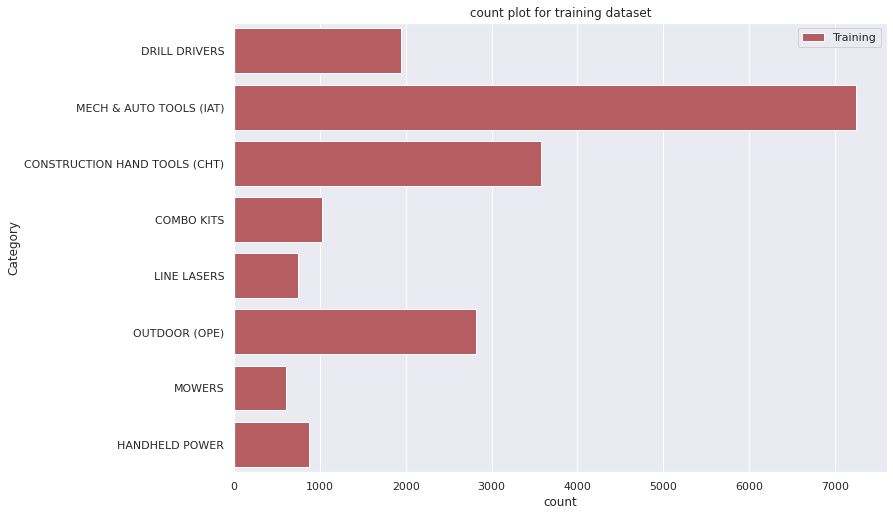

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

#Check Training data nnd test data proportion
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y="Category", data=data, label='Training', color='r')
plt.title('count plot for training dataset')
plt.legend()
plt.show()

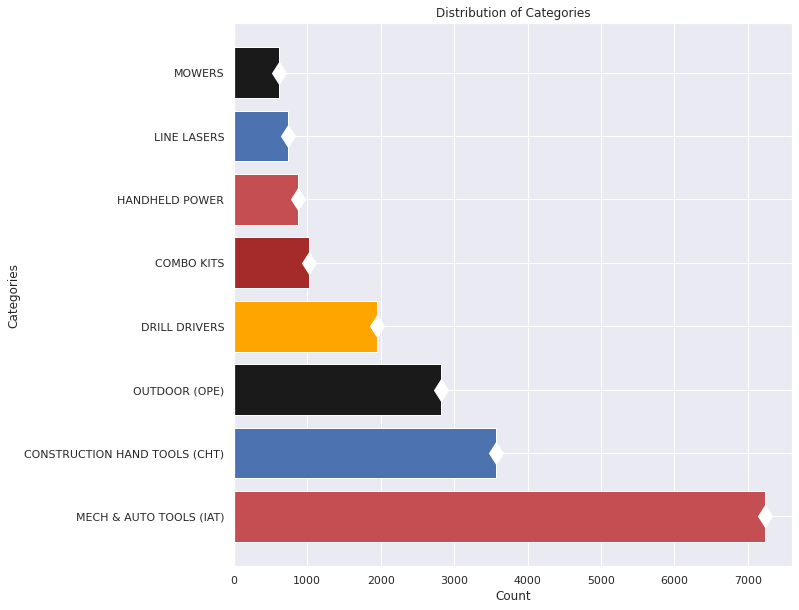

In [ ]:
#data prep
b=data['Category'].value_counts()
d=pd.DataFrame({'Category':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
#plot
plt.rcParams.update({'font.size': 38})
fig, ax = plt.subplots(figsize=(10,10))
colors=['r', 'b', 'k', 'orange', 'brown']
ax.plot(sort_df.Statistics, d.Category,"d", color='white', markersize=16)
ax.barh(sort_df.Category, width=sort_df.Statistics, color=colors)
plt.xlabel("Count")
plt.ylabel("Categories")
plt.title("Distribution of Categories");

### MECH & AUTO TOOLS (IAT) category have the hightest coun of Titles

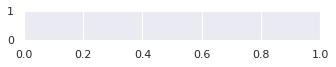

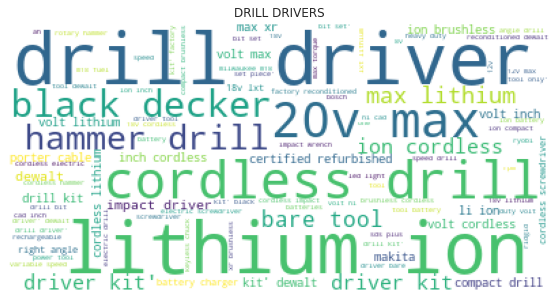

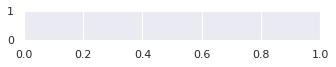

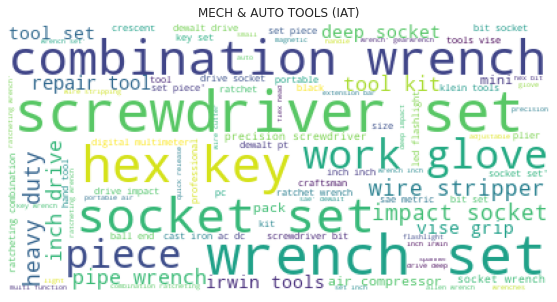

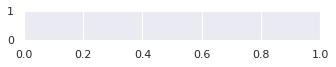

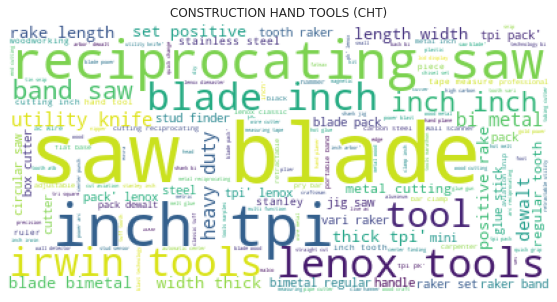

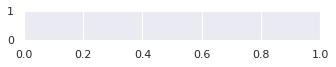

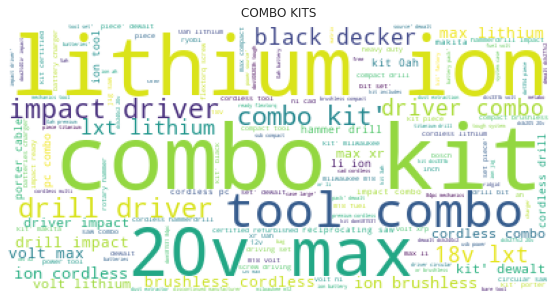

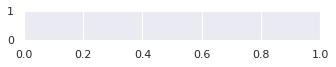

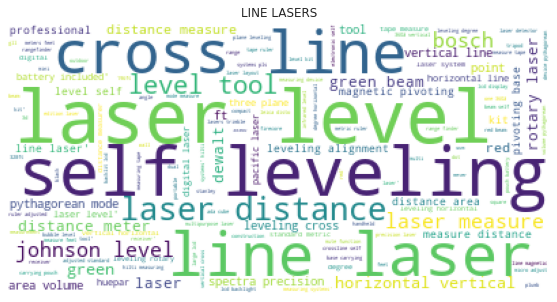

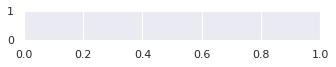

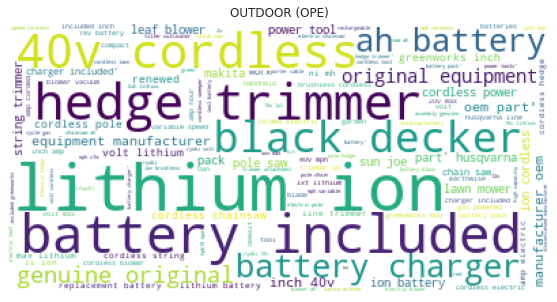

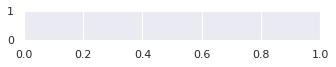

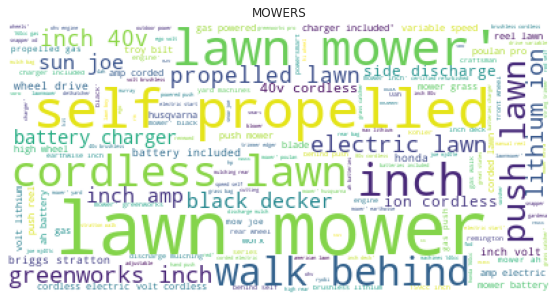

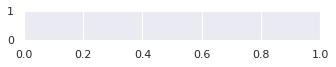

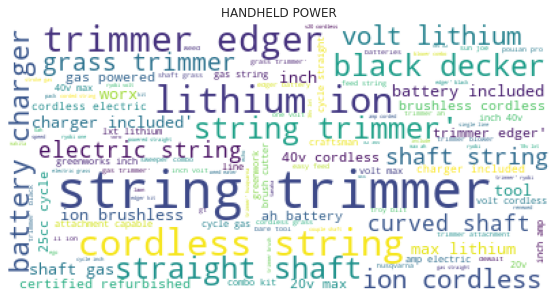

In [ ]:
#World cloud plot the see the different word frequecy for each category,
# to understand the most common words in all of these classes.
for i, category in enumerate(data['Category'].unique()):
    text = str(list(data[data['Category']==category]['review']))
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white"
                      ).generate(text)
    plt.subplot(13,2,i+1)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(category)
    plt.show()

### After looking at the wordcloud, we find that there are few common words among the list of categories like Lithium, ion, electric.

### Also there are words that distinguish each category from each other like: in category Handled power we have words like : trimmer, shaft, string, grass trimmer, etc,

### COMBO KITS category has words like: combo, kit, tool kit, impact, driver, etc.

### Construction hand tools (CHT) category has words like: Balde, inch, reciprocating, saw, etc.

### Mech & auto tools (IAT) category has words like: Screwdriver, wrench, hex, key, piece, etc.

### Drill drivers category has words like: Drill, cordless, 20v, max, hammer, driver, etc.

### Mowers category has words like: Lawn, propelled, inch, mower, etc.

### Outdoor (OPE) category has words like: Black, decker, hedge, cordless, 40v, etc.

### Line lasers category has words like: Line, cross, level, laser,etc.


In [ ]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves" ]

In [ ]:
def remove_stopwords(data):
  data['review without stopwords'] = data['review'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))
  return data

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result


In [ ]:
data_without_stopwords = remove_stopwords(data1)
data_without_stopwords['clean_review']= data_without_stopwords['review without stopwords'].apply(lambda cw : remove_tags(cw))
data_without_stopwords['clean_review'] = data_without_stopwords['clean_review'].str.replace('[{}]'.format(string.punctuation), ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [ ]:
data_without_stopwords.head()

,review,Category,review without stopwords,clean_review
0,milwaukee 2606-22ct m18 18-volt lithium-ion 0....,DRILL DRIVERS,milwaukee 2606-22ct m18 18-volt lithium-ion 0....,milwaukee 2606 22ct m18 18 volt lithium ion 0 ...
1,"ikea. fixa screwdriver/drill, lithium-ion",DRILL DRIVERS,"ikea. fixa screwdriver/drill, lithium-ion",ikea fixa screwdriver drill lithium ion
2,jims usa multimeter volt probe kit,MECH & AUTO TOOLS (IAT),jims usa multimeter volt probe kit,jims usa multimeter volt probe kit
3,"porter-cable 9862 3/8"" 12 volt t-handle cordle...",DRILL DRIVERS,"porter-cable 9862 3/8"" 12 volt t-handle cordle...",porter cable 9862 3 8 12 volt t handle cordle...
4,porter-cable 12870 riptide 4-1/2-inch 20 tooth...,CONSTRUCTION HAND TOOLS (CHT),porter-cable 12870 riptide 4-1/2-inch 20 tooth...,porter cable 12870 riptide 4 1 2 inch 20 tooth...


In [ ]:
data_without_stopwords_test = remove_stopwords(test_data)
data_without_stopwords_test['clean_review']= data_without_stopwords_test['review without stopwords'].apply(lambda cw : remove_tags(cw))
data_without_stopwords_test['clean_review'] = data_without_stopwords_test['clean_review'].str.replace('[{}]'.format(string.punctuation), ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [ ]:
data_without_stopwords_test.head()

,review,review without stopwords,clean_review
0,heavy duty: days and nights in judas priest,heavy duty: days nights judas priest,heavy duty days nights judas priest
1,the book of yields: accuracy in food costing a...,book yields: accuracy food costing purchasing,book yields accuracy food costing purchasing
2,klutz lego chain reactions science & building ...,klutz lego chain reactions science & building ...,klutz lego chain reactions science building ...
3,how to build and modify gm ls-series engines (...,build modify gm ls-series engines (motorbooks ...,build modify gm ls series engines motorbooks ...
4,writing patient/client notes: ensuring accurac...,writing patient/client notes: ensuring accurac...,writing patient client notes ensuring accurac...


In [ ]:

reviews = data_without_stopwords['clean_review']
reviews

0        milwaukee 2606 22ct m18 18 volt lithium ion 0 ...
1                ikea  fixa screwdriver drill  lithium ion
2                       jims usa multimeter volt probe kit
3        porter cable 9862 3 8  12 volt t handle cordle...
4        porter cable 12870 riptide 4 1 2 inch 20 tooth...
                               ...                        
18837    gwx air compressor  intelligent digital displa...
18838    gwx car tyre pump  intelligent digital display...
18839    gwx car tyre pump  tyre inflator smart digital...
18840    gwx air compressor  portable tire air pump sma...
18841    gwx tyre inflator  portable air compressor car...
Name: clean_review, Length: 18842, dtype: object

In [ ]:

reviews_test = data_without_stopwords_test['clean_review']
reviews_test

0                     heavy duty  days nights judas priest
1            book yields  accuracy food costing purchasing
2        klutz lego chain reactions science   building ...
3        build modify gm ls series engines  motorbooks ...
4        writing patient client notes  ensuring accurac...
                               ...                        
24873    idalinya quick cutting hand saw perfect sawing...
24874    idalinya sk 5 alloy steel pruning shears garde...
24875    idalinya 2pcs gardening knife tools carbon ste...
24876    idalinya 210mm round edge steel garden pruning...
24877    idalinya round edge steel garden pruning shear...
Name: clean_review, Length: 24878, dtype: object

In [ ]:
reviews_list = []
for i in range(len(reviews)):
  reviews_list.append(reviews[i])



In [ ]:
reviews_list_test = []
for i in range(len(reviews_test)):
  reviews_list_test.append(reviews_test[i])



In [ ]:
Category = data_without_stopwords['Category']

In [ ]:
len(Category.unique())

8

In [ ]:
data['Category'] = data['Category'].map(
                   {'DRILL DRIVERS':1,
       'MECH & AUTO TOOLS (IAT)':2,
       'CONSTRUCTION HAND TOOLS (CHT)':3, 'COMBO KITS':4,
       'LINE LASERS':5, 'OUTDOOR (OPE)':6,
       'MOWERS':7, 'HANDHELD POWER':8})
# y = np.array(list(map(lambda x: 1 if x=="positive" else 0, sentiment)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data['Category']

0        1
1        1
2        2
3        1
4        3
        ..
18837    2
18838    2
18839    2
18840    2
18841    2
Name: Category, Length: 18842, dtype: int64

In [ ]:
y = np.array(data['Category'])

In [ ]:
y

array([1, 1, 2, ..., 2, 2, 2])

In [ ]:
unique, counts = np.unique(y, return_counts=True)
print(unique)
counts

[1 2 3 4 5 6 7 8]


array([1951, 7237, 3576, 1029,  743, 2820,  613,  873])

In [ ]:
X_train, X_test,Y_train, Y_test = train_test_split(reviews_list, y, test_size=0.2, random_state = 45)

In [ ]:
len(Y_train)

15073

In [ ]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, dtype ="uint8")
Y_test = to_categorical(Y_test, dtype ="uint8")

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [ ]:
words_to_index = tokenizer.word_index

In [ ]:
len(words_to_index)

18221

In [ ]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



  return word_to_vec_map
    

In [ ]:
word_to_vec_map = read_glove_vector('./Dataset/glove.6B.100d.txt')

In [ ]:
maxLen = 150


In [ ]:

vocab_len = len(words_to_index)+1
embed_vector_len = word_to_vec_map['moon'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index, :] = embedding_vector

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)






In [ ]:
def imdb_rating(input_shape):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = LSTM(128, return_sequences=True)(embeddings)

  X = Dropout(0.6)(X)

  X = LSTM(128, return_sequences=True)(X)

  X = Dropout(0.6)(X)

  X = LSTM(128)(X)

  X = Dense(9, activation='softmax')(X)

  model = Model(inputs=X_indices, outputs=X)

  return model

In [ ]:
model = imdb_rating((maxLen,))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 100)          1822200   
                                                                 
 lstm (LSTM)                 (None, 150, 128)          117248    
                                                                 
 dropout (Dropout)           (None, 150, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 150, 128)          131584    
                                                                 
 dropout_1 (Dropout)         (None, 150, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584

In [ ]:
X_train_indices = tokenizer.texts_to_sequences(X_train)

In [ ]:
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')
X_train_indices.shape

(15073, 150)

In [ ]:
test_data_indices = tokenizer.texts_to_sequences(reviews_list_test)

In [ ]:
test_data_indices = pad_sequences(test_data_indices, maxlen=maxLen, padding='post')
test_data_indices.shape

(24878, 150)

In [ ]:
import tensorflow
adam = tensorflow.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='CategoricalCrossentropy', metrics=['accuracy'])
# loss=tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)
print(unique)
counts

[0 1]


array([120584,  15073])

In [ ]:
Y_train.shape

(15073, 9)

In [ ]:
X_test_indices = tokenizer.texts_to_sequences(X_test)

X_test_indices = pad_sequences(X_test_indices, maxlen=maxLen, padding='post')

In [ ]:
model.fit(X_train_indices, Y_train,validation_data=(X_test_indices, Y_test), batch_size=64, epochs=20)

Epoch 1/20
236/236 [==============================] - 13s 32ms/step - loss: 1.8178 - accuracy: 0.3819 - val_loss: 1.7363 - val_accuracy: 0.3855
Epoch 2/20
236/236 [==============================] - 7s 28ms/step - loss: 1.4840 - accuracy: 0.4187 - val_loss: 1.3355 - val_accuracy: 0.4861
Epoch 3/20
236/236 [==============================] - 7s 28ms/step - loss: 1.3053 - accuracy: 0.4728 - val_loss: 1.2616 - val_accuracy: 0.4922
Epoch 4/20
236/236 [==============================] - 7s 28ms/step - loss: 1.2414 - accuracy: 0.4890 - val_loss: 1.1737 - val_accuracy: 0.5105
Epoch 5/20
236/236 [==============================] - 11s 45ms/step - loss: 1.1294 - accuracy: 0.5304 - val_loss: 1.0171 - val_accuracy: 0.5840
Epoch 6/20
236/236 [==============================] - 10s 44ms/step - loss: 0.9669 - accuracy: 0.5905 - val_loss: 0.8844 - val_accuracy: 0.6179
Epoch 7/20
236/236 [==============================] - 7s 28ms/step - loss: 0.8812 - accuracy: 0.6188 - val_loss: 0.8121 - val_accuracy: 0.6

In [ ]:
model.evaluate(X_test_indices, Y_test)

118/118 [==============================] - 1s 11ms/step - loss: 0.4212 - accuracy: 0.8559


[0.42119160294532776, 0.855929970741272]

In [ ]:
preds = model.predict(X_test_indices)
preds_train = model.predict(X_train_indices)

In [ ]:
len(preds[0])

9

In [ ]:
df_test = pd.DataFrame(columns = ['review', 'pred_Category'])
df_train = pd.DataFrame(columns = ['review', 'pred_Category'])

In [ ]:
df_test['review'] = X_test
df_train['review'] = X_train

In [ ]:
pred_list = []
pred_list_train = []
for i in range(len(preds)):
  pred_list.append(preds[i].argmax())

for i in range(len(preds_train)):
  pred_list_train.append(preds_train[i].argmax())

In [ ]:
df_test['pred_Category'] = pred_list
df_train['pred_Category'] = pred_list_train

In [ ]:
df_train['pred_Category'] = df_train['pred_Category'].map(
                   {1:'DRILL DRIVERS',
       2:'MECH & AUTO TOOLS (IAT)',
       3:'CONSTRUCTION HAND TOOLS (CHT)', 4:'COMBO KITS',
       5:'LINE LASERS', 6:'OUTDOOR (OPE)',
       7:'MOWERS', 8:'HANDHELD POWER'})

df_test['pred_Category'] = df_test['pred_Category'].map(
                   {1:'DRILL DRIVERS',
       2:'MECH & AUTO TOOLS (IAT)',
       3:'CONSTRUCTION HAND TOOLS (CHT)', 4:'COMBO KITS',
       5:'LINE LASERS', 6:'OUTDOOR (OPE)',
       7:'MOWERS', 8:'HANDHELD POWER'})

In [ ]:
df_final = pd.concat([df_train, df_test], axis=0)

In [ ]:
test_preds = model.predict(test_data_indices)

In [ ]:
test_preds_list = []
for i in range(len(test_preds)):
  test_preds_list.append(test_preds[i].argmax())

In [ ]:
test_data1['Category_glove'] = test_preds_list

In [ ]:
test_data1['Category_glove'] = test_data1['Category_glove'].map(
                   {1:'DRILL DRIVERS',
       2:'MECH & AUTO TOOLS (IAT)',
       3:'CONSTRUCTION HAND TOOLS (CHT)', 4:'COMBO KITS',
       5:'LINE LASERS', 6:'OUTDOOR (OPE)',
       7:'MOWERS', 8:'HANDHELD POWER'})

In [ ]:
test_data1.rename(columns = {'review':'Title'}, inplace = True)
test_data1.head(2)

,Date Added,Track Item,Retailer,Retailer Item ID,TLD,UPC,Title,Manufacturer,Brand,Client Product Group,Category,Subcategory,Amazon Sub Category,Category_glove
0,6/15/2019,NEEDS REVIEW - KRAGLE THIRD PARTY KEYWORD - HE...,amazon,'0306903318,com,',Heavy Duty: Days and Nights in Judas Priest,NaN,NaN,NaN,NaN,NaN,NaN,CONSTRUCTION HAND TOOLS (CHT)
1,6/15/2019,NEEDS REVIEW - KRAGLE THIRD PARTY KEYWORD - AC...,amazon,'0470197498,com,',The Book of Yields: Accuracy in Food Costing a...,NaN,NaN,NaN,NaN,NaN,NaN,MECH & AUTO TOOLS (IAT)


# Conceptnet embeddings below:

In [ ]:
word_to_vec_map = read_glove_vector('./Dataset/numberbatch-en-19.08.txt')

In [ ]:
maxLen = 150


In [ ]:

vocab_len = len(words_to_index)+1
embed_vector_len = word_to_vec_map['moon'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index, :] = embedding_vector

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)






In [ ]:
def imdb_rating(input_shape):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = LSTM(128, return_sequences=True)(embeddings)

  X = Dropout(0.6)(X)

  X = LSTM(128, return_sequences=True)(X)

  X = Dropout(0.6)(X)

  X = LSTM(128)(X)

  X = Dense(9, activation='softmax')(X)

  model = Model(inputs=X_indices, outputs=X)

  return model

In [ ]:
model = imdb_rating((maxLen,))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 300)          5466600   
                                                                 
 lstm_3 (LSTM)               (None, 150, 128)          219648    
                                                                 
 dropout_2 (Dropout)         (None, 150, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 150, 128)          131584    
                                                                 
 dropout_3 (Dropout)         (None, 150, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               1315

In [ ]:
X_train_indices = tokenizer.texts_to_sequences(X_train)

In [ ]:
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')
X_train_indices.shape

(15073, 150)

In [ ]:
test_data_indices = tokenizer.texts_to_sequences(reviews_list_test)

In [ ]:
test_data_indices = pad_sequences(test_data_indices, maxlen=maxLen, padding='post')
test_data_indices.shape

(24878, 150)

In [ ]:
import tensorflow
adam = tensorflow.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='CategoricalCrossentropy', metrics=['accuracy'])
# loss=tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)
print(unique)
counts

[0 1]


array([120584,  15073])

In [ ]:
Y_train.shape

(15073, 9)

In [ ]:
X_test_indices = tokenizer.texts_to_sequences(X_test)

X_test_indices = pad_sequences(X_test_indices, maxlen=maxLen, padding='post')

In [ ]:
model.fit(X_train_indices, Y_train,validation_data=(X_test_indices, Y_test), batch_size=64, epochs=20)

Epoch 1/20
236/236 [==============================] - 13s 39ms/step - loss: 1.8186 - accuracy: 0.3824 - val_loss: 1.7374 - val_accuracy: 0.3855
Epoch 2/20
236/236 [==============================] - 7s 29ms/step - loss: 1.7492 - accuracy: 0.3837 - val_loss: 1.7071 - val_accuracy: 0.3855
Epoch 3/20
236/236 [==============================] - 7s 29ms/step - loss: 1.2902 - accuracy: 0.4903 - val_loss: 1.1462 - val_accuracy: 0.5285
Epoch 4/20
236/236 [==============================] - 7s 29ms/step - loss: 1.1216 - accuracy: 0.5486 - val_loss: 1.0437 - val_accuracy: 0.5874
Epoch 5/20
236/236 [==============================] - 7s 30ms/step - loss: 1.0231 - accuracy: 0.6055 - val_loss: 0.9514 - val_accuracy: 0.6368
Epoch 6/20
236/236 [==============================] - 7s 29ms/step - loss: 0.9266 - accuracy: 0.6427 - val_loss: 0.9077 - val_accuracy: 0.6455
Epoch 7/20
236/236 [==============================] - 7s 29ms/step - loss: 0.8570 - accuracy: 0.6703 - val_loss: 0.7969 - val_accuracy: 0.702

In [ ]:
model.evaluate(X_test_indices, Y_test)

118/118 [==============================] - 1s 12ms/step - loss: 0.5559 - accuracy: 0.7957


[0.5558773875236511, 0.795701801776886]

In [ ]:
preds = model.predict(X_test_indices)
preds_train = model.predict(X_train_indices)

In [ ]:
len(preds[0])

9

In [ ]:
df_test = pd.DataFrame(columns = ['review', 'pred_Category'])
df_train = pd.DataFrame(columns = ['review', 'pred_Category'])

In [ ]:
df_test['review'] = X_test
df_train['review'] = X_train

In [ ]:
pred_list = []
pred_list_train = []
for i in range(len(preds)):
  pred_list.append(preds[i].argmax())

for i in range(len(preds_train)):
  pred_list_train.append(preds_train[i].argmax())

In [ ]:
df_test['pred_Category'] = pred_list
df_train['pred_Category'] = pred_list_train

In [ ]:
df_train['pred_Category'] = df_train['pred_Category'].map(
                   {1:'DRILL DRIVERS',
       2:'MECH & AUTO TOOLS (IAT)',
       3:'CONSTRUCTION HAND TOOLS (CHT)', 4:'COMBO KITS',
       5:'LINE LASERS', 6:'OUTDOOR (OPE)',
       7:'MOWERS', 8:'HANDHELD POWER'})

df_test['pred_Category'] = df_test['pred_Category'].map(
                   {1:'DRILL DRIVERS',
       2:'MECH & AUTO TOOLS (IAT)',
       3:'CONSTRUCTION HAND TOOLS (CHT)', 4:'COMBO KITS',
       5:'LINE LASERS', 6:'OUTDOOR (OPE)',
       7:'MOWERS', 8:'HANDHELD POWER'})

In [ ]:
df_final = pd.concat([df_train, df_test], axis=0)

In [ ]:
test_preds = model.predict(test_data_indices)

In [ ]:
test_preds_list = []
for i in range(len(test_preds)):
  test_preds_list.append(test_preds[i].argmax())

In [ ]:
test_data1['Category_conceptnet'] = test_preds_list

In [ ]:
test_data1['Category_conceptnet'] = test_data1['Category_conceptnet'].map(
                   {1:'DRILL DRIVERS',
       2:'MECH & AUTO TOOLS (IAT)',
       3:'CONSTRUCTION HAND TOOLS (CHT)', 4:'COMBO KITS',
       5:'LINE LASERS', 6:'OUTDOOR (OPE)',
       7:'MOWERS', 8:'HANDHELD POWER'})

In [ ]:
test_data1.rename(columns = {'review':'Title'}, inplace = True)
test_data1.head(2)

,Date Added,Track Item,Retailer,Retailer Item ID,TLD,UPC,Title,Manufacturer,Brand,Client Product Group,Category,Subcategory,Amazon Sub Category,Category_glove,Category_conceptnet
0,6/15/2019,NEEDS REVIEW - KRAGLE THIRD PARTY KEYWORD - HE...,amazon,'0306903318,com,',Heavy Duty: Days and Nights in Judas Priest,NaN,NaN,NaN,NaN,NaN,NaN,CONSTRUCTION HAND TOOLS (CHT),COMBO KITS
1,6/15/2019,NEEDS REVIEW - KRAGLE THIRD PARTY KEYWORD - AC...,amazon,'0470197498,com,',The Book of Yields: Accuracy in Food Costing a...,NaN,NaN,NaN,NaN,NaN,NaN,MECH & AUTO TOOLS (IAT),CONSTRUCTION HAND TOOLS (CHT)


In [ ]:
data1.to_excel("./final_output_categroised.xlsx", sheet_name = '479-Catalog-20190721',  index=False)

In [ ]:
test_data1.to_excel("./final_output.xlsx", sheet_name = 'Uncategorised',  index=False)